<h1>
<center>Titanic Dataset Complete Analysis</center>
</h1>

### Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


### Overview

The data has been provided as a single training file:

* training set (train.csv)

The **training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class.

### Data Dictionary

|<h3>**Variable**</h3>|<h3>**Definition**</h3>|<h3>**Key**</h3>|
|:-|:-|:-|
|PassengerId|Unique Identifier of each passenger||
|Survived|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Name|Name of Passenger||
|Sex|Gender||
|Age|Age in years||
|SibSp|# of siblings / spouses aboard the Titanic||
|Parch|# of parents / children aboard the Titanic||
|Ticket|Ticket number||
|Fare|Passenger fare||
|Cabin|Cabin number||
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

* Detail of some of the variables is provided. You need to explore rest of the varibles yourself.

#### Import Libraries

In [96]:
###
### Please import all the libraries in this block
### Write your code here
###
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#### Read Data

In [2]:
### 
### Using pandas library read the data in a dataframe
### Write your code here
###
df = pd.read_csv("train.csv")

#### Dimensions of Data

In [3]:
### 
### Print Number of Rows and Columns in the dataset
### Write your code here
###
df.shape

(891, 12)

#### Peak at the Data

In [4]:
###
### Print first 10 rows of the data
### Write your code here
###
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
###
### Print last 10 rows of the data
### Write your code here
###
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


#### Attributes in Data

In [6]:
###
### Print all the attribute/column names
### Write your code here
###
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Data types of Attributes

In [78]:
###
### Print datatypes of all attributes
### Separate Discrete and Continuous Attributes programmatically
### Write your code here
###

discrete=[]
continuous=[]
for i in range (0, len(df.dtypes)):
    if df.dtypes[i]==('int64') or df.dtypes[i]==('object'):
       # print(df.dtypes[i] , df.columns[i])
        discrete.append(df.columns[i])
    else:
        continuous.append(df.columns[i])
        
print(discrete, '' ,continuous)
        

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']  ['Age', 'Fare']


#### Describe the Data

In [8]:
###
### Print the description of data
### You should know what it means to describe a continuous attribute
### And what it means to describe a discrete attribute
### Make separate blocks for each of these
### Write your code here
###

df.describe(exclude=[float])

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,681,147,3
top,NaN,NaN,NaN,"Compton, Miss. Sara Rebecca",male,NaN,NaN,1601,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,7,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,0.523008,0.381594,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,1.102743,0.806057,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN


In [9]:
###
df.describe(include=[float])
###

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


#### Exploratory Data Analysis

In [10]:
###
### For this section you should plot 2 graphs for each attribute
### First graph should display the distribution of data in each attribute
### Second graph should display how the attribute changes with respect to target class

###
### Take advantage of matplotlib and any other plotting library
### Remember your graph should be meaningful and properly labeled
### You should understand that when the type of variable changes - it's representation also changes
###
### In some of the attributes you would discover that plotting them is not possible
### Could you tell why plotting these attributes is not possible?
### Is there any way to resolve this issue?
###
### Please remember not to make any changes in the original dataframe
###
### Write your code here
###

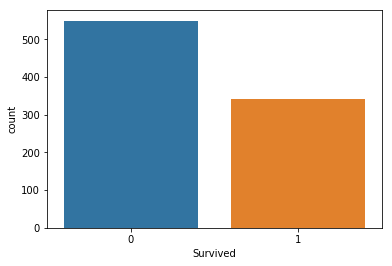

In [11]:
sns.countplot(x=df['Survived'])
plt.show()

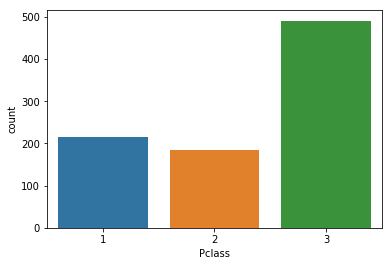

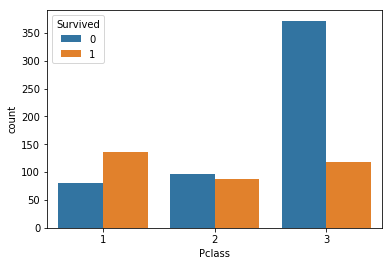

In [12]:
sns.countplot(x=df['Pclass'])
plt.show()
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.show()

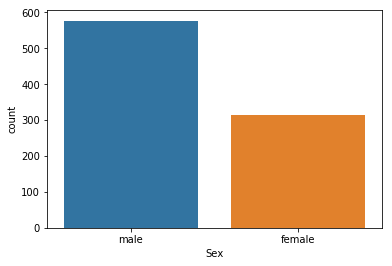

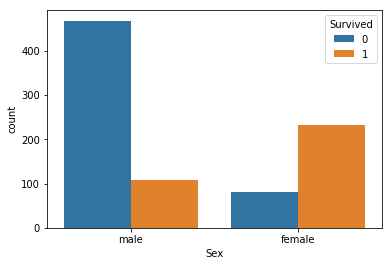

In [13]:
sns.countplot(x=df['Sex'])
plt.show()
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.show()

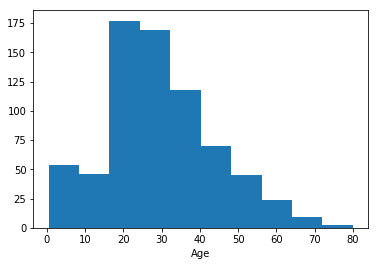

In [14]:
df['Age'].hist(grid=False)
plt.xlabel('Age')
plt.show()

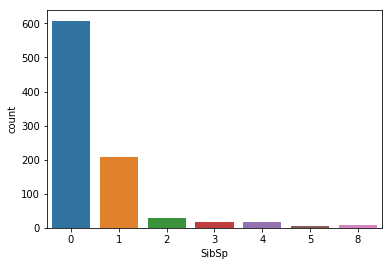

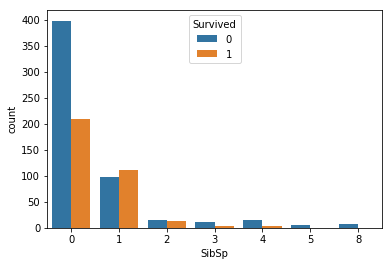

In [15]:
sns.countplot(x=df['SibSp'])
plt.show()
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.show()

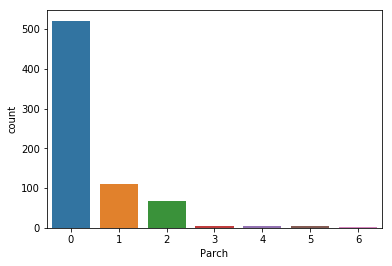

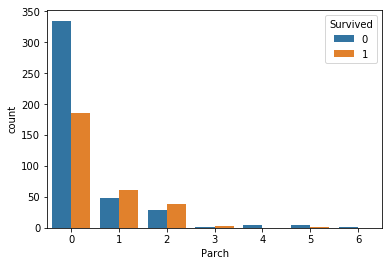

In [80]:
sns.countplot(x=df['Parch'])
plt.show()
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.legend(loc='upper right',title='Survived')
plt.show()

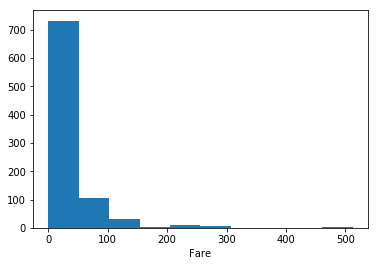

In [17]:
df['Fare'].hist(grid=False)
plt.xlabel('Fare')
plt.show()

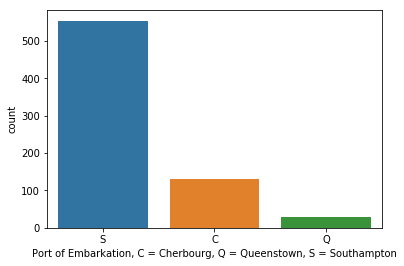

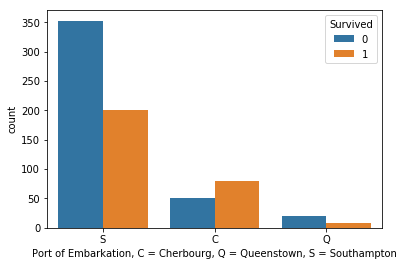

In [125]:
sns.countplot(x=df['Embarked'])
plt.xlabel("Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton")
plt.show()
sns.countplot(x=df['Embarked'],hue=df['Survived'])
plt.xlabel("Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton")
plt.show()

<h3> Great! Let's Keep Going </h3>
* I hope now you have a good understanding of data.
* Let's move to the next phase of data science

### Pre-processing

In [126]:
###
### Check for duplicate rows. If found handle them.
df.duplicated(['Name']).any()
###


False

In [127]:
###
### Check for missing values. If found handle them in the best possible manner
### Write your code here
datasubset=df
datasubset.isnull().sum()
#datasubset.dropna(subset=['Age'], how='all', inplace = True)
datasubset['Age'] = datasubset['Age'].fillna((datasubset['Age'].mean()))


###

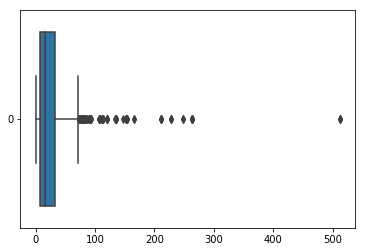

In [128]:
###
### Check for outliers. If found handle them in the best possible manner
### Write your code here
data=df
sns.boxplot(data=data['Fare'],orient='h')
###

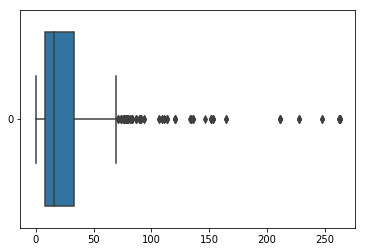

In [129]:
#Removing Fare value that was above 500(Concidering it as outlier as visible from boxplot shown above)
temp=data
outliers = temp[temp['Fare'] < 500]
sns.boxplot(data=outliers['Fare'],orient='h')

In [130]:
clean_data = outliers.copy()

#### Building a Decision Tree Model

Decision Trees (DTs) are a non-parametric supervised learning method used for classification. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

* Decision Trees are very flexible, and expressive classifiers.
* They can accommodate any kind of data i.e numeric, categorical and e.t.c.
* They can accommodate any number of classes,they are inherently multi-class
* Most importantly, they are **extremely interpretable**

In [134]:
y=clean_data[['Survived']].copy()
#y


In [148]:
data['Sex'].replace(0, 'female',inplace=True)
data['Sex'].replace(1, 'male',inplace=True)

In [149]:
features = ['Pclass','Age','SibSp',
        'Parch','Fare','Sex']

In [150]:
X = clean_data[features].copy()
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex'], dtype='object')

In [152]:
### 
### Before you train your model, split the data in training and testing set. 
### You would end up with 4 slices of data
### X_train = contains training features
### y_train = contains training labels
### Y_train = contains testing features
### y_test = contains testing labels
###
### Write your code here
###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [153]:
#type(X_train)
#type(X_test)
#type(y_train)
#type(y_test)
#X_train.head()
#y_train.describe()

In [176]:
### 
### Using sklearn train a simple decision Tree Classifier on training data
### Use default settings and do not change any parameters of the module
###
### Write your code here 
###
classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [178]:
training_predictions = classifier.predict(X_train)

In [175]:
predictions = classifier.predict(X_test)


In [172]:
###
### Points To Ponder:
### 
### Can you pass categorical(in string format) data to machine learning model.
### If Yes. Then I definetly need to learn something from you.
### If No. Explain that error and how you handled that error?
###

No we cann't pass the categorical data.In order to handel that we must need to convert it into discrete numerical form
Like I have done for 'Sex' column.
I have replaced Male  with 1 and Female with 0 and resolved the issue this way

#### Report Accuracy For Decision Tree

In [173]:
###
### Report your accuracy for training set and testing set both
### i.e. 
### Training Accuracy = ???
### Testing Accuracy = ???
###
Testing Accuracy = accuracy_score(y_true = y_test, y_pred = predictions)


0.8042553191489362

In [179]:
Training Accuracy = accuracy_score(y_true = y_train, y_pred = training_predictions)

0.8529411764705882


#### Building a Simple Linear Model

As a starter to linear models, we will be using a simple linear model called **Logistic Regression.** 
* Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. 
* Logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.
* This all might be very new to you. So for the time being, just consider **Logistic Regression as a linear classifier that classifies that a passenger survived or not survived.**
* <font color='red'> Please do not complain if you haven't studied Logistic Regression. It's not a big deal, just Google it!

In [202]:
### 
### Using sklearn
### Train a simple Logistic Regression Model on training data
### Use default settings and do not change any parameters of the module
### 
features = ['Pclass','Age','SibSp',
        'Parch','Fare','Sex']
target = ['Survived']
df1=clean_data
X = df1[features]


In [203]:
y = df1[target]

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [215]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf1 = clf.fit(X_train, y_train)
y_pred_prob_Rtree=clf1.predict_proba(X_test)[:,1]
y_pred_prob_Rtree_Train=clf1.predict_proba(X_train)[:,1]

##Report Accuracy for Logistic Regression

In [217]:
###
### Report your accuracy for training set and testing set both
### i.e. 
### Training Accuracy = ???
### Testing Accuracy = ???
###
print('Training Acc: ',accuracy_score(y_train, clf.predict(X_train)))
print('Testing Acc: ',accuracy_score(y_test, clf.predict(X_test)))

Training Acc:  0.9957983193277311
Testing Acc:  0.7106382978723405


#### Report Accuracy For Logistic Regression

#### Comparison 

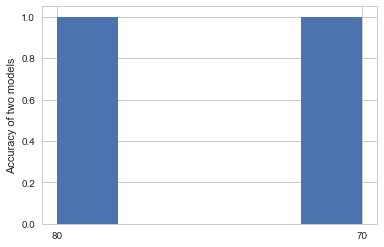

In [250]:
###
### Plot a graph that clearly shows the testing accuracy comparison of both models.
### It should be properly labeled and intuitive.
###

a=['80','70']
plt.hist(a,bins=5)
plt.ylabel('Accuracy of two models');